<a href="https://colab.research.google.com/github/octaviasst/LEARN-CNN/blob/main/Salinan_CNN_Data_Dari_Dosen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

read file

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/CNN-TESIS/data-percobaan/xtrain1.csv',header=None) 
X_test = pd.read_csv('/content/drive/MyDrive/CNN-TESIS/data-percobaan/xtest1.csv',header=None)
y_train = pd.read_csv('/content/drive/MyDrive/CNN-TESIS/data-percobaan/ytrain01.csv', header=None)
y_test= pd.read_csv('/content/drive/MyDrive/CNN-TESIS/data-percobaan/ytest.csv', header=None)


In [ ]:
X_train.shape

(90, 40)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.002240,0.423903,0.209612,0.288928,0.353648,0.070660,0.466341,0.097274,0.043502,0.329283,0.186150,0.271967,0.295906,0.335215,0.109557,0.140010,0.260327,0.153750,0.338072,0.116715,0.002240,0.423903,0.209612,0.288928,0.353648,0.070660,0.466341,0.097274,0.043502,0.329283,0.186150,0.271967,0.295906,0.335215,0.109557,0.140010,0.260327,0.153750,0.338072,0.116715
1,0.107504,0.162968,0.331926,0.177764,0.264647,0.170586,0.012190,0.472734,0.364628,0.080461,0.497110,0.016123,0.055327,0.460011,0.242738,0.372419,0.476126,0.397587,0.191736,0.072539,0.107504,0.162968,0.331926,0.177764,0.264647,0.170586,0.012190,0.472734,0.364628,0.080461,0.497110,0.016123,0.055327,0.460011,0.242738,0.372419,0.476126,0.397587,0.191736,0.072539
2,0.136765,0.117694,0.097720,0.227777,0.490025,0.007247,0.391747,0.386746,0.166154,0.351323,0.319461,0.285731,0.392890,0.082810,0.141209,0.023139,0.372129,0.236707,0.435848,0.139214,0.136765,0.117694,0.097720,0.227777,0.490025,0.007247,0.391747,0.386746,0.166154,0.351323,0.319461,0.285731,0.392890,0.082810,0.141209,0.023139,0.372129,0.236707,0.435848,0.139214
3,0.351805,0.363254,0.086816,0.198444,0.182740,0.272548,0.077330,0.389433,0.228366,0.288870,0.225075,0.479799,0.306653,0.116473,0.240026,0.258700,0.361202,0.127531,0.088959,0.140681,0.351805,0.363254,0.086816,0.198444,0.182740,0.272548,0.077330,0.389433,0.228366,0.288870,0.225075,0.479799,0.306653,0.116473,0.240026,0.258700,0.361202,0.127531,0.088959,0.140681
4,0.403048,0.068855,0.478228,0.074011,0.309920,0.186008,0.036628,0.274388,0.237683,0.142164,0.372140,0.414868,0.176298,0.392113,0.342083,0.082310,0.062824,0.277688,0.052752,0.209177,0.403048,0.068855,0.478228,0.074011,0.309920,0.186008,0.036628,0.274388,0.237683,0.142164,0.372140,0.414868,0.176298,0.392113,0.342083,0.082310,0.062824,0.277688,0.052752,0.209177


In [ ]:
y_train.shape

(90, 1)

In [ ]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


CNN Model

In [ ]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=10,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    

training

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)
y_train.shape

(90, 5)

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/10
3/3 [==============================] - 5s 467ms/step - loss: 1.6897 - accuracy: 0.2778 - val_loss: 1.5993 - val_accuracy: 0.4111
Epoch 2/10
3/3 [==============================] - 0s 150ms/step - loss: 0.7707 - accuracy: 0.6667 - val_loss: 1.5788 - val_accuracy: 0.8111
Epoch 3/10
3/3 [==============================] - 0s 108ms/step - loss: 0.4713 - accuracy: 0.8778 - val_loss: 1.5449 - val_accuracy: 0.9778
Epoch 4/10
3/3 [==============================] - 0s 151ms/step - loss: 0.3519 - accuracy: 0.8889 - val_loss: 1.5081 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 62ms/step - loss: 0.2836 - accuracy: 0.8889 - val_loss: 1.4717 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 60ms/step - loss: 0.2530 - accuracy: 0.8889 - val_loss: 1.4347 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 61ms/step - loss: 0.2195 - accuracy: 0.8889 - val_loss: 1.3986 - val_accuracy: 1.0000
Epoch 8/10
3/3 [=======

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


plotting

Accuracy: 100.00%


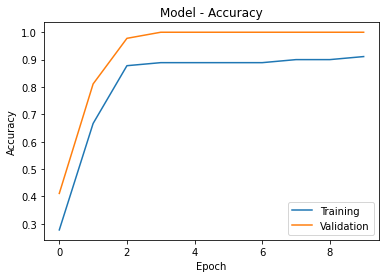

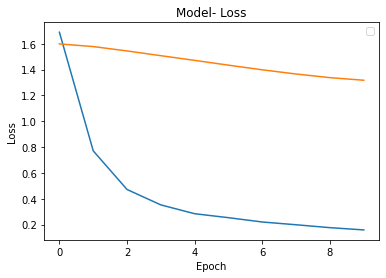

In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


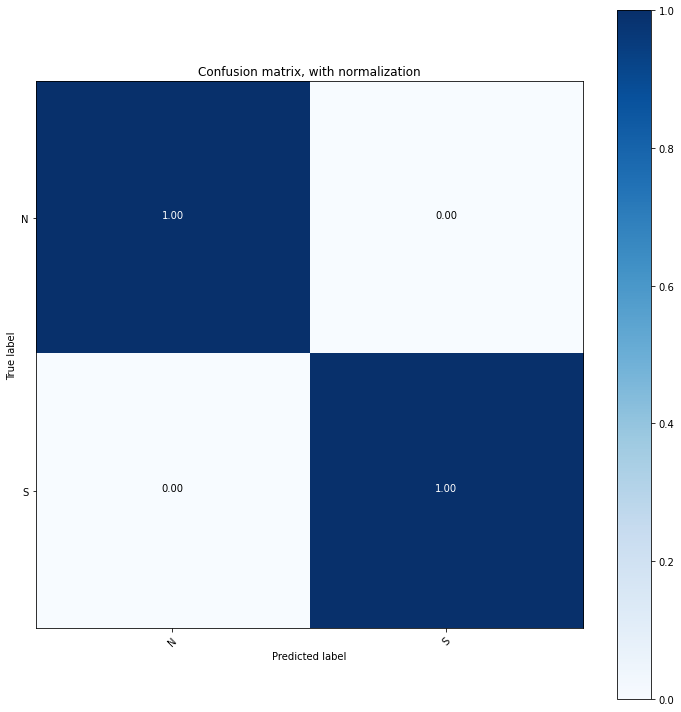

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()